In [ ]:
import heartpy as hp
import matplotlib.pyplot as plt

In [ ]:
data, _ = hp.load_exampledata(0)
fs = 100.0

In [ ]:
print(data)
print(len(data))

In [ ]:
working_data, measures = hp.process(data, fs)

In [ ]:
# check all dictionary in measures
print(measures)

In [ ]:
print(working_data)

In [ ]:
print(working_data['hr'])
print(len(working_data['hr']))

In [ ]:
hp.plotter(working_data, measures)

# Trying with Vernier Data

In [91]:
import pandas as pd
import heartpy as hp
import matplotlib.pyplot as plt
import datetime as dt

# CSV_SOURCE = "../dataset/martin60d/vernier/martin60d_vernier.csv"
CSV_SOURCE = "../dataset/martin60c/vernier/martin60c_vernier.csv"

In [92]:
df = pd.read_csv(CSV_SOURCE, header=None)
df.columns = ['TIME','RR','ECG']
print(df)

                            TIME        RR       ECG
0     2022-11-22 15:49:22.028366  5.682602  0.443909
1     2022-11-22 15:49:22.028366  5.646835 -0.288751
2     2022-11-22 15:49:22.128418  5.667274  0.275216
3     2022-11-22 15:49:22.128418  5.646835  0.360632
4     2022-11-22 15:49:22.228540  5.467987  0.479681
...                          ...       ...       ...
1195  2022-11-22 15:50:21.731410  5.038742 -0.549374
1196  2022-11-22 15:50:21.831144  5.054077  0.015097
1197  2022-11-22 15:50:21.831144  5.036186  0.113039
1198  2022-11-22 15:50:21.930877  4.962097  0.303608
1199  2022-11-22 15:50:21.930877  4.801132  0.152994

[1200 rows x 3 columns]


In [93]:
# get the start time
start_time = df["TIME"][0]
start_time = dt.datetime.strptime(start_time, "%Y-%m-%d %H:%M:%S.%f")

# get the end time
end_time = df["TIME"][len(df) - 1]
end_time = dt.datetime.strptime(end_time, "%Y-%m-%d %H:%M:%S.%f")

# get the duration
duration = end_time - start_time

# validate fps
fps = len(df) / duration.total_seconds()
print(f"FPS -> {fps}")

FPS -> 20.03254921984823


In [148]:
# normalized ecg values to integer
norm_ecg = df['ECG'].values
norm_ecg = norm_ecg - norm_ecg.min()
norm_ecg = norm_ecg / norm_ecg.max()
norm_ecg = norm_ecg * 1000
norm_ecg = norm_ecg.astype(int)

In [149]:
norm_ecg = norm_ecg[200:450]

In [150]:
working_data, measures = hp.process(norm_ecg, fps, high_precision=True, clipping_scale=True)

In [155]:
print(measures['bpm'])

137.48592701010847


In [151]:
# print(working_data)

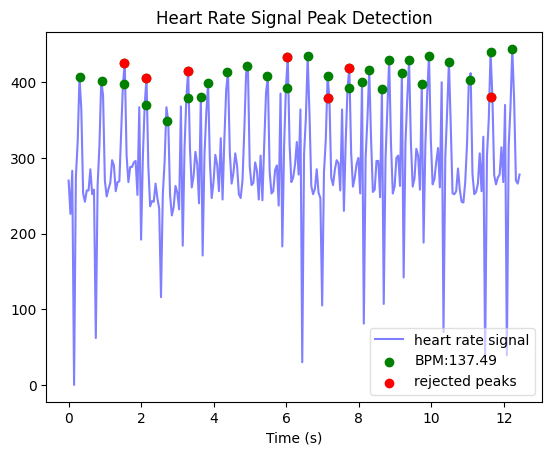

In [165]:
plotresults = hp.plotter(working_data, measures, show=False)

In [170]:
plotresults.savefig("martin60c.png")

In [153]:
peaklocation = working_data['peaklist']
removed_beats = working_data['removed_beats']
peaklocation = [x for x in peaklocation if x not in removed_beats]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

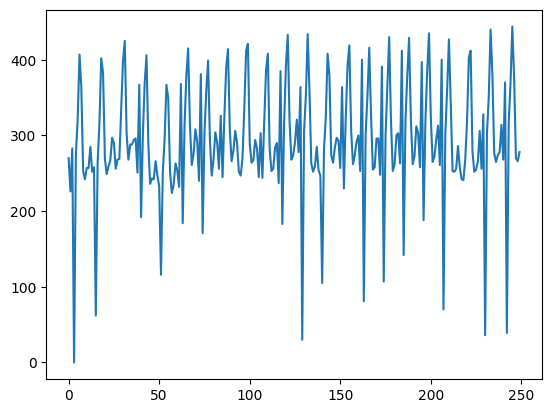

In [154]:
# plot using matplotlib
plt.plot(norm_ecg)
# give x mark on the peak location
plt.plot(peaklocation, norm_ecg[peaklocation], "x")
plt.show()